<a href="https://colab.research.google.com/github/mvakhmenin/MindSet/blob/main/Mind_set_%D0%BF%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D1%85_%D1%80%D1%8F%D0%B4%D0%BE%D0%B2_Sktime_(c_%D0%B2%D0%B0%D1%80%D0%B8%D0%B0%D0%BD%D1%82%D0%B0%D0%BC%D0%B8_%D0%BF%D1%80%D0%B8%D0%B2%D0%B4%D0%B5%D0%BD%D0%B8%D1%8F_%D0%BA_%D1%81%D1%82%D0%B0%D1%86%D0%B8%D0%BE%D0%BD%D0%B0%D1%80%D0%BD%D0%BE%D0%BC%D1%83).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Устанавливаем пакеты

In [ ]:
pip install sktime

     |████████████████████████████████| 5.9 MB 2.5 MB/s 
     |████████████████████████████████| 3.3 MB 45.7 MB/s 
     |████████████████████████████████| 23.1 MB 5.6 kB/s 
     |████████████████████████████████| 9.8 MB 51.2 MB/s 
     |████████████████████████████████| 26.3 MB 68 kB/s 
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.34.0
    Uninstalling llvmlite-0.34.0:
      Successfully uninstalled llvmlite-0.34.0
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Attempting uninstall: numba
    Found existing installation: numba 0.51.2
    Uninstalling numba-0.51.2:
      Successfully uninstalled numba-0.51.2


In [ ]:
pip install yadisk # документация - https://yadisk.readthedocs.io/

     |████████████████████████████████| 48 kB 1.6 MB/s 


In [ ]:
from sktime.datasets import load_airline
from sktime.forecasting.model_selection import temporal_train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yadisk

# Загружаем данные

In [ ]:
try:
  df_init = pd.read_csv('prices2017-2021.csv', 
                        sep=';', 
                        usecols=[0, 1, 2, 3, 4, 5], 
                        skiprows=1,
                        header=0,
                        names=['Dates', 'Sand', 'Stone', 'Concreat', 'Electricity', 'Cement'])
except:
  print('Файл не найден, скачиваю файл')
  ya = yadisk.YaDisk(token="xxxxx")

  # Check if the token is valid
  if ya.check_token():
    print('Токен работает')
  else: 
    print('Какая-то проблема с токеном, получаем новый токен')
    # Ниже указываются ID и Пароль, которые можно получить по ссылке https://oauth.yandex.ru/ 
    # для приложения: GoogleColab-YandexDisk
    ya = yadisk.YaDisk("805fcf6bb2ee4d35bae767e44044574e", "3c5eef2e166e4e16890b64a6ef3f337d")
    url = ya.get_code_url()

    print("Go to the following url: %s" % url)
    code = input("Enter the confirmation code: ")

    try:
      response = ya.get_token(code)
    except yadisk.exceptions.BadRequestError:
      print("Bad code")
      sys.exit(1)

    ya.token = response.access_token

    if ya.check_token():
      print("Sucessfully received token!")
    else:
      print("Something went wrong. Not sure how though...")

      # Скачиваем данные с Яндекс.диска
    files = ['prices2017-2021.csv']
    for f in files:
      print('Скачиваю файл', f)
      ya.download("/"+f, f)

    df_init = pd.read_csv('prices2017-2021.csv', 
                    sep=';', 
                    usecols=[0, 1, 2, 3, 4, 5], 
                    skiprows=1,
                    header=0,
                    names=['Dates', 'Sand', 'Stone', 'Concreat', 'Electricity', 'Cement'])


Файл не найден, скачиваю файл
Какая-то проблема с токеном, получаем новый токен
Go to the following url: https://oauth.yandex.ru/authorize?response_type=code&client_id=805fcf6bb2ee4d35bae767e44044574e&display=popup&force_confirm=yes
Enter the confirmation code: 7409958
Sucessfully received token!
Скачиваю файл prices2017-2021.csv


#Очищаем данные и исправляем типы

In [ ]:
# Очищаем данные и исправляем типы 
df_init.Sand = df_init.Sand.apply(lambda x: str(x).replace(',', '.'))
df_init.Stone = df_init.Stone.apply(lambda x: str(x).replace(',', '.'))
df_init.Concreat = df_init.Concreat.apply(lambda x: str(x).replace(',', '.'))
df_init.Electricity = df_init.Electricity.apply(lambda x: str(x).replace(',', '.'))
df_init.Cement = df_init.Cement.apply(lambda x: str(x).replace(',', '.'))

df_init.Stone = df_init.Stone.apply(lambda x: str(x).replace(' ', ''))
df_init.Concreat = df_init.Concreat.apply(lambda x: str(x).replace(' ', ''))
df_init.Electricity = df_init.Electricity.apply(lambda x: str(x).replace(' ', ''))
df_init.Cement = df_init.Cement.apply(lambda x: str(x).replace(' ', ''))

df_init.Sand = pd.to_numeric(df_init.Sand)
df_init.Stone = pd.to_numeric(df_init.Stone)
df_init.Concreat = pd.to_numeric(df_init.Concreat)
df_init.Electricity = pd.to_numeric(df_init.Electricity)
df_init.Cement = pd.to_numeric(df_init.Cement)

df_init.Dates = pd.to_datetime(df_init.Dates)
df_init.set_index('Dates', inplace=True)

# Меняем тип индекса датафрейма на Period в соответствии с требованиями Sktime
df_init.index = pd.period_range(start=df_init.index[0], end=df_init.index[-1], freq='M')

В составе библиотеки есть 13 датасетов. Для обзора возьмем "load_airline" (количество международных пассажиров самолетов авиакомпании Box-Jenkins в месяц с 1949 по 1960 год)

In [ ]:
y = load_airline()
y_train, y_test = temporal_train_test_split(y)

Также в составе библиотекие есть функция для разделения датасета на обучающий и тестовый (temporal_train_test_split), она импортирует функцию train_test_split из sklearn, и вызывает ее с параметром shuffle=False

Посмотрим на данные. По умолчанию обучающий датасет - 75%

In [ ]:
display(y)

Period
1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
           ...  
1960-08    606.0
1960-09    508.0
1960-10    461.0
1960-11    390.0
1960-12    432.0
Freq: M, Name: Number of airline passengers, Length: 144, dtype: float64

In [ ]:
print(y_train.shape)
print(y_test.shape)

(108,)
(36,)


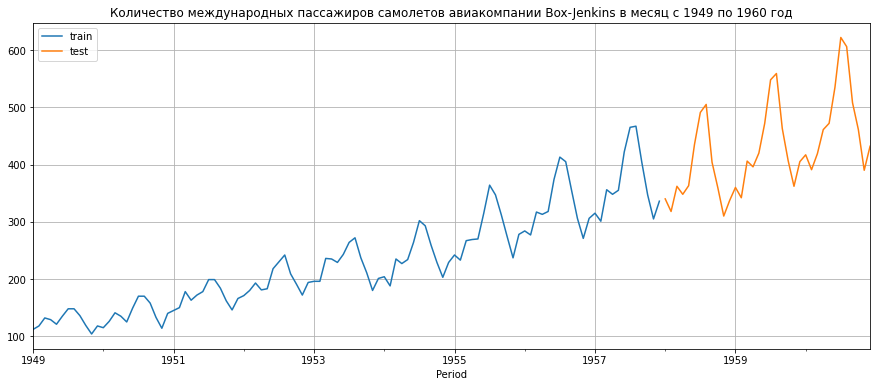

In [ ]:
y_train.plot(figsize=(15,6), grid=True, title='Количество международных пассажиров самолетов авиакомпании Box-Jenkins в месяц с 1949 по 1960 год', label='train')
y_test.plot(figsize=(15,6), grid=True, label='test')
plt.legend()
None

В составе библиотеки есть алгоритмы, реализующие простейшие методы предсказаний для установки baseline.
Класс NaiveForecaster
Стратегии предсказания:

* "last" - просто повторяет последнее значение на горизонт прогнозирования, если параметр "sp" = 1, если "sp" != 1, берет "sp" в качестве длины сезона и повторяет значения предыдущего сезона
* "mean" - берет среднее значение по всей обучающей выборке и повторяет на горизонт прогнозирования (если "sp" = 1), либо берет среднее значение из каждого периода сезона обучающей выборки и повторяет на горизонт прогнозирования (если "sp" != 1). С помощью параметра window_length можно ограничить усредняемые значения тренировочной выборки определенным периодом
* "drift" - берет два значения на границах window_length, проводит через них прямую и продолжает на горизонт прогнозирования

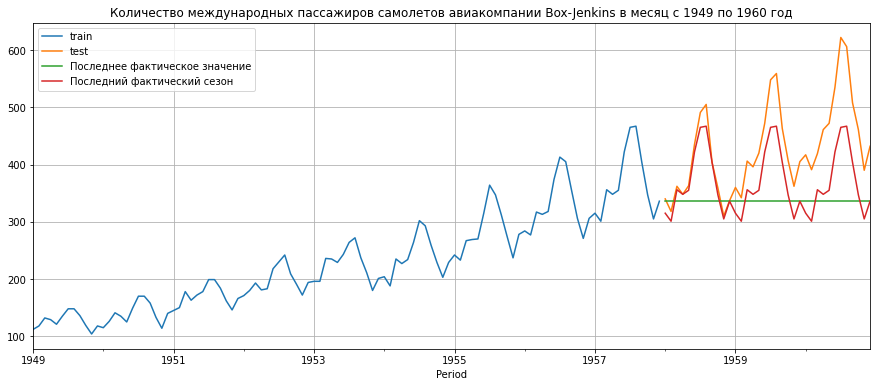

In [ ]:
from sktime.forecasting.naive import NaiveForecaster

fh = np.arange(1, len(y_test)+1)

naive_forecaster_last = NaiveForecaster(strategy="last", sp=1)
naive_forecaster_last.fit(y_train)
y_last = naive_forecaster_last.predict(fh)

naive_forecaster_seasonal = NaiveForecaster(strategy="last", sp=12)
naive_forecaster_seasonal.fit(y_train)
y_seasonal_last = naive_forecaster_seasonal.predict(fh)

y_train.plot(figsize=(15,6), grid=True, title='Количество международных пассажиров самолетов авиакомпании Box-Jenkins в месяц с 1949 по 1960 год', label='train')
y_test.plot(figsize=(15,6), grid=True, label='test')
y_last.plot(figsize=(15,6), grid=True, label='Последнее фактическое значение')
y_seasonal_last.plot(figsize=(15,6), grid=True, label='Последний фактический сезон')
plt.legend()
None

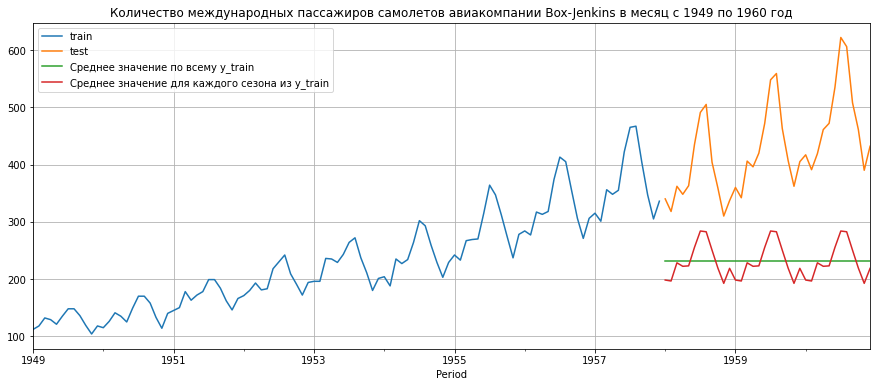

In [ ]:
naive_forecaster_mean = NaiveForecaster(strategy="mean", sp=1)
naive_forecaster_mean.fit(y_train)
y_mean = naive_forecaster_mean.predict(fh)

naive_forecaster_seasonal_mean = NaiveForecaster(strategy="mean", sp=12)
naive_forecaster_seasonal_mean.fit(y_train)
y_seasonal_mean = naive_forecaster_seasonal_mean.predict(fh)

y_train.plot(figsize=(15,6), grid=True, title='Количество международных пассажиров самолетов авиакомпании Box-Jenkins в месяц с 1949 по 1960 год', label='train')
y_test.plot(figsize=(15,6), grid=True, label='test')
y_mean.plot(figsize=(15,6), grid=True, label='Cреднее значение по всему y_train')
y_seasonal_mean.plot(figsize=(15,6), grid=True, label='Среднее значение для каждого сезона из y_train')
plt.legend()
None

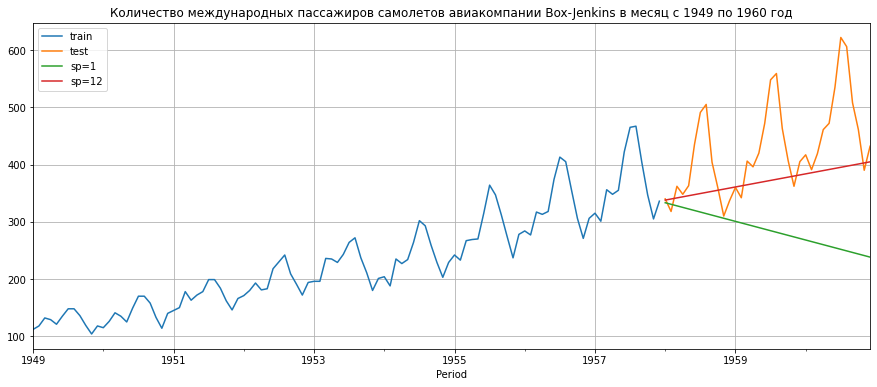

In [ ]:
naive_forecaster_drift = NaiveForecaster(strategy="drift", window_length=8)
naive_forecaster_drift.fit(y_train)
y_drift = naive_forecaster_drift.predict(fh)

naive_forecaster_seasonal_drift = NaiveForecaster(strategy="drift", window_length=12)
naive_forecaster_seasonal_drift.fit(y_train)
y_seasonal_drift = naive_forecaster_seasonal_drift.predict(fh)

y_train.plot(figsize=(15,6), grid=True, title='Количество международных пассажиров самолетов авиакомпании Box-Jenkins в месяц с 1949 по 1960 год', label='train')
y_test.plot(figsize=(15,6), grid=True, label='test')
y_drift.plot(figsize=(15,6), grid=True, label='sp=1')
y_seasonal_drift.plot(figsize=(15,6), grid=True, label='sp=12')
plt.legend()
None

Sktime поддерживает множество широко используемых алгоритмов предсказания, в том числе и из современных библиотек. Все алгоритмы предсказания используют унифицированный интерфейс Sktime. Основные реализованные алгоритмы на настоящий момент (сентябрь 2021):

* ExponentialSmoothing (экспоненциальное сглаживание), ThetaForecaster (простое экспоненциальное сглаживание + drift) и autoETS (автоматическое экспоненциальное сглаживание) из библиотеки statsmodels
* ARIMA и autoARIMA из библиотеки pmdarima
* BATS и TBATS из библиотеки tbats
* PolynomialTrend для прогнозирования полиноминальных трендов
* Интерфейс к Prophet из библиотеки Facebook prophet

Все алгоритмы прогнозирования, реализованные в sktime, могут быть выведены командой all_estimators 

In [ ]:
from sktime.registry import all_estimators
#all_estimators("forecaster", as_dataframe=True)

<h2>Экспоненциальное сглаживание в sktime</h2>

ETS MAPE: 5.14%
AutoETS MAPE: 6.32%
Theta MAPE: 8.66%


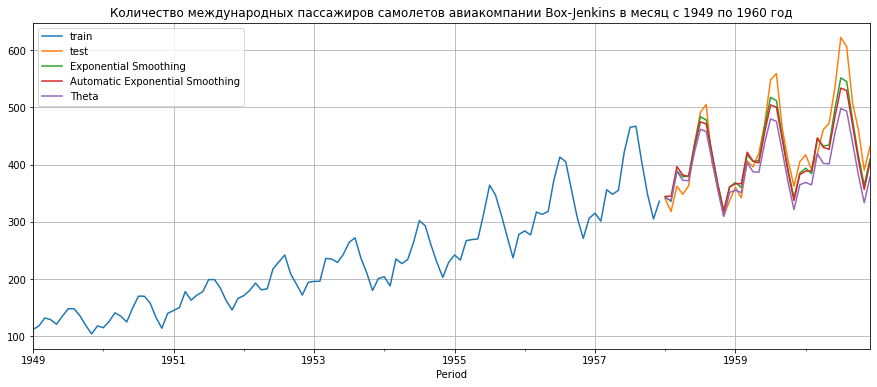

In [ ]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.ets import AutoETS
from sktime.forecasting.theta import ThetaForecaster

es_forecaster = ExponentialSmoothing(trend='add', seasonal='multiplicative', sp=12)
es_forecaster.fit(y_train)
es_y_pred = es_forecaster.predict(fh)

aes_forecaster = AutoETS(auto=True, sp=12)
aes_forecaster.fit(y_train)
aes_y_pred = aes_forecaster.predict(fh)

th_forecaster = ThetaForecaster(sp=12)
th_forecaster.fit(y_train)
th_y_pred = th_forecaster.predict(fh)

y_train.plot(figsize=(15,6), grid=True, title='Количество международных пассажиров самолетов авиакомпании Box-Jenkins в месяц с 1949 по 1960 год', label='train')
y_test.plot(figsize=(15,6), grid=True, label='test')
es_y_pred.plot(figsize=(15,6), grid=True, label='Exponential Smoothing')
aes_y_pred.plot(figsize=(15,6), grid=True, label='Automatic Exponential Smoothing')
th_y_pred.plot(figsize=(15,6), grid=True, label='Theta')
plt.legend()
print(f'ETS MAPE: {es_forecaster.score(y_test)*100:.2f}%')
print(f'AutoETS MAPE: {aes_forecaster.score(y_test)*100:.2f}%')
print(f'Theta MAPE: {th_forecaster.score(y_test)*100:.2f}%')

ETS MAPE Песок: 2.31%
AutoETS MAPE Песок: 2.92%
Theta MAPE: 2.01%


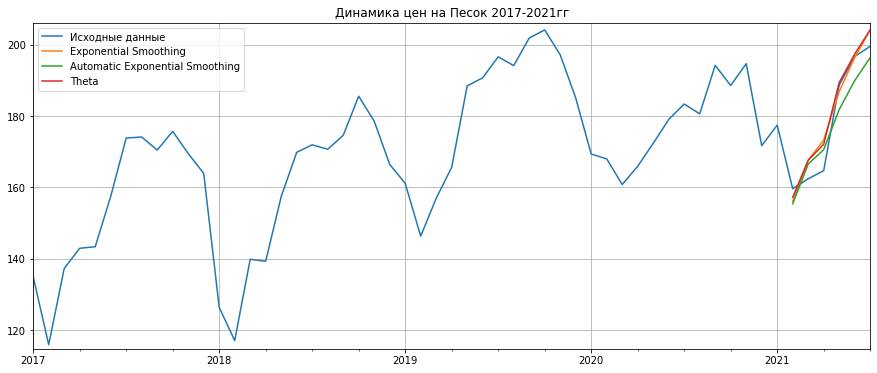

ETS MAPE Щебень: 2.96%
AutoETS MAPE Щебень: 1.62%
Theta MAPE: 2.26%


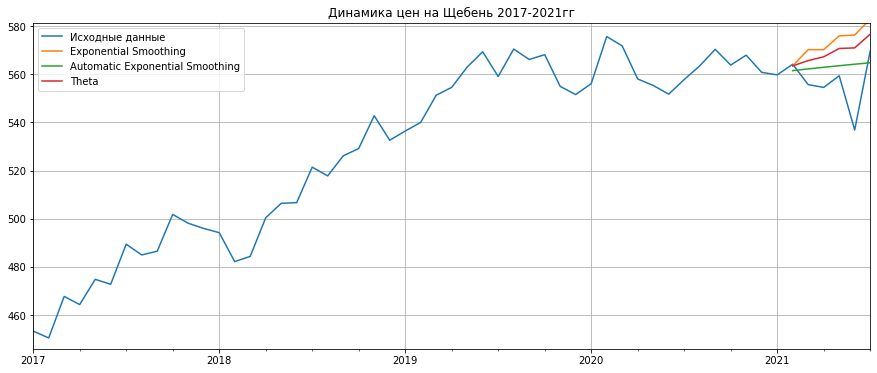

ETS MAPE Бетон: 2.41%
AutoETS MAPE Бетон: 1.79%
Theta MAPE: 2.68%


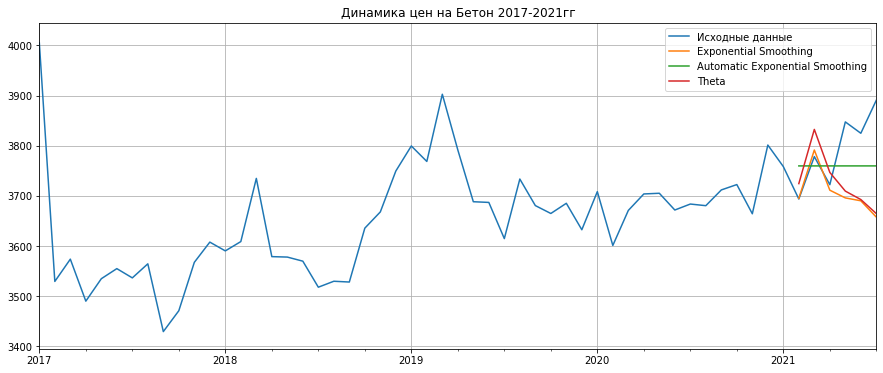

ETS MAPE Электроэнергия: 1.90%
AutoETS MAPE Электроэнергия: 3.01%
Theta MAPE: 2.20%


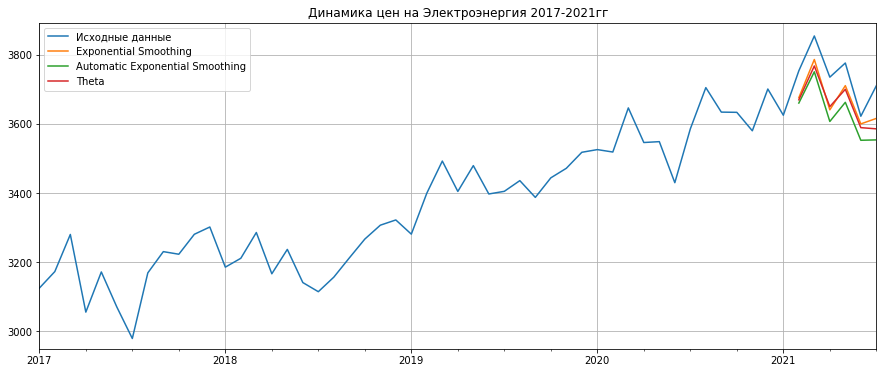

ETS MAPE Цемент: 1.03%
AutoETS MAPE Цемент: 1.15%
Theta MAPE: 0.65%


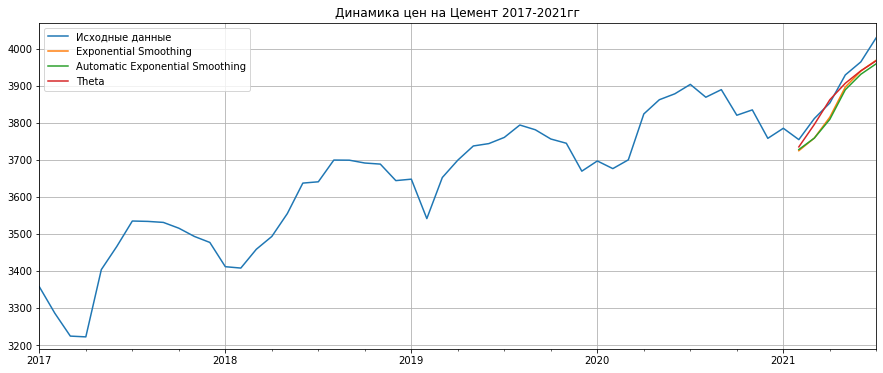

In [ ]:
materials = {'Песок': 'Sand', 
             'Щебень': 'Stone', 
             'Бетон': 'Concreat', 
             'Электроэнергия': 'Electricity', 
             'Цемент': 'Cement'}

scores = {'Песок': [], 
          'Щебень': [], 
          'Бетон': [], 
          'Электроэнергия': [], 
          'Цемент': []}
scores_index = []

fh_materials = np.arange(1, 7)

scores_index.append('ETS MAPE')
scores_index.append('AutoETS MAPE')
scores_index.append('Theta MAPE')

for key in materials:
  es_forecaster.fit(df_init[materials[key]][:-6])
  es_y_pred_materials = es_forecaster.predict(fh_materials)
  aes_forecaster.fit(df_init[materials[key]][:-6])
  aes_y_pred_materials = aes_forecaster.predict(fh_materials)
  th_forecaster.fit(df_init[materials[key]][:-6])
  th_y_pred_materials = th_forecaster.predict(fh_materials)
  df_init[materials[key]].plot(figsize=(15,6), 
                               ylim=(df_init[materials[key]].min()*0.99, df_init[materials[key]].max()*1.01), 
                               grid=True, 
                               title='Динамика цен на '+key+' 2017-2021гг', 
                               label='Исходные данные')
  es_y_pred_materials.plot(figsize=(15,6), grid=True, label='Exponential Smoothing')
  aes_y_pred_materials.plot(figsize=(15,6), grid=True, label='Automatic Exponential Smoothing')
  th_y_pred_materials.plot(figsize=(15,6), grid=True, label='Theta')
  plt.legend()
  print(f'ETS MAPE {key}: {es_forecaster.score(df_init[materials[key]][-6:])*100:.2f}%')
  scores[key].append(f'{es_forecaster.score(df_init[materials[key]][-6:])*100:.2f}%')
  print(f'AutoETS MAPE {key}: {aes_forecaster.score(df_init[materials[key]][-6:])*100:.2f}%')
  scores[key].append(f'{aes_forecaster.score(df_init[materials[key]][-6:])*100:.2f}%')
  print(f'Theta MAPE: {th_forecaster.score(df_init[materials[key]][-6:])*100:.2f}%')
  scores[key].append(f'{th_forecaster.score(df_init[materials[key]][-6:])*100:.2f}%')
  plt.show()

Различные модели экспоненциального сглаживания оказываются лучшими на разных данных. Лучший результат по прогнозированию цен на бетон в работе по экспоненциальному сглаживанию (https://colab.research.google.com/drive/1G76VKfj6NJVvVD_PO5Y9CjNG7B9vGgJp) показало двойное экспоненциальное сглаживание с параметрами alpha = 0.3, beta = 0.3 (MAPE Бетон = 1.16%).
Применим двойное экспонециальное сглаживание (sp=1) в реализации sktime и сравним результаты.

Double Exponential Smoothing MAPE Цемент: 1.63%


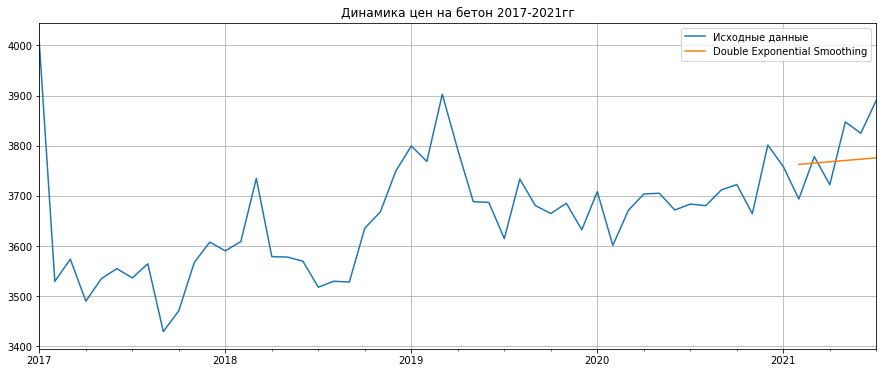

In [ ]:
es2_forecaster = ExponentialSmoothing(trend='add', sp=1)
es2_forecaster.fit(df_init.Concreat[:-6])
es2_y_pred = es2_forecaster.predict(fh_materials)

df_init.Concreat.plot(figsize=(15,6), 
                               ylim=(df_init.Concreat.min()*0.99, df_init.Concreat.max()*1.01), 
                               grid=True, 
                               title='Динамика цен на бетон 2017-2021гг', 
                               label='Исходные данные')
es2_y_pred.plot(figsize=(15,6), grid=True, label='Double Exponential Smoothing')
plt.legend()
print(f'Double Exponential Smoothing MAPE {key}: {es2_forecaster.score(df_init.Concreat[-6:])*100:.2f}%')
plt.show()

C параметрами по умолчанию используется расчетный (estimated) способ определения параметров сглаживания. При нем начальные значения параметров сглаживания берутся их имеющихся данных (heuristic), после чего параметры сглаживания уточняются в процессе обучения модели. Способ определения параметров сглаживания устанавливается параметром 'initialization_method'. Чтобы установить параметры сглаживания в ручную необходимо установить значение этого параметра в 'known'

Double Exponential Smoothing tuned MAPE: 8.43%


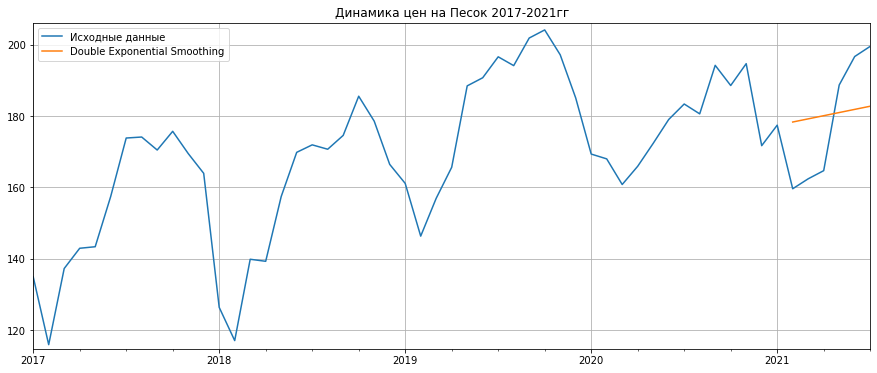

Double Exponential Smoothing tuned MAPE: 2.19%


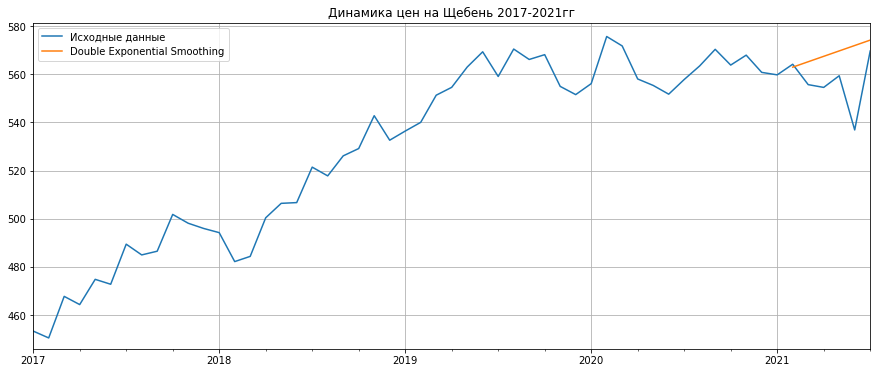

Double Exponential Smoothing tuned MAPE: 1.21%


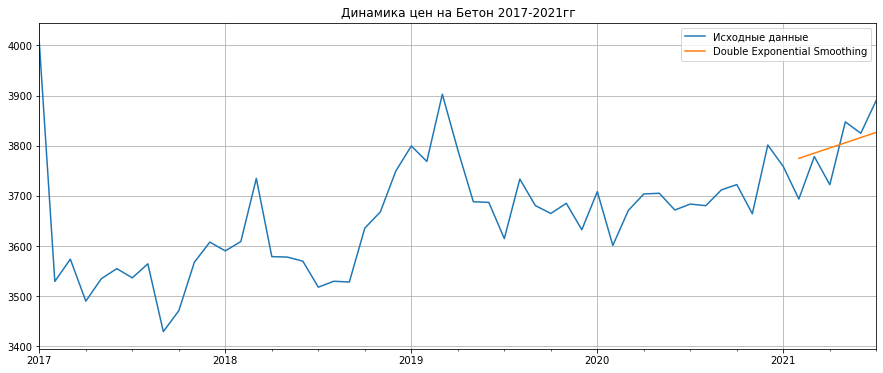

Double Exponential Smoothing tuned MAPE: 4.25%


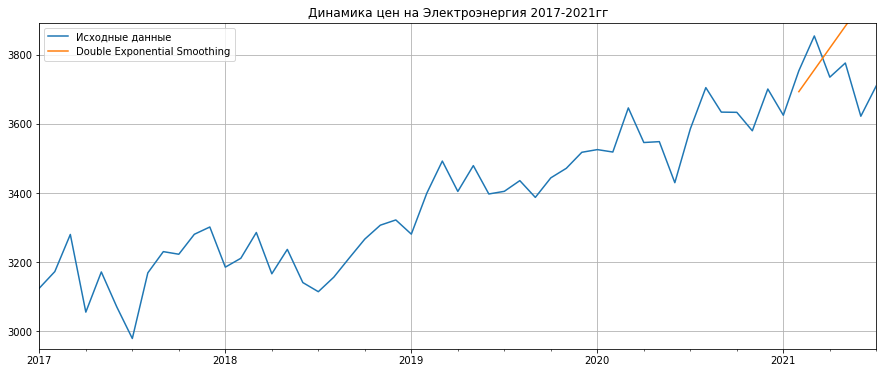

Double Exponential Smoothing tuned MAPE: 2.85%


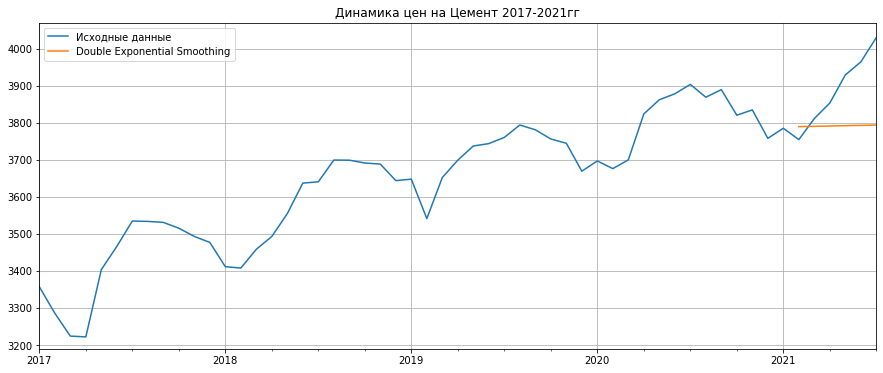

In [ ]:
scores_index.append('Double ETS MAPE')

for key in materials:
  es2_tuned_forecaster = ExponentialSmoothing(trend='add', sp=1, initial_level=0.3, initial_trend=0.3, initialization_method='known')
  es2_tuned_forecaster.fit(df_init[materials[key]][:-6])
  es2_tuned_y_pred = es2_tuned_forecaster.predict(fh_materials)

  df_init[materials[key]].plot(figsize=(15,6), 
                               ylim=(df_init[materials[key]].min()*0.99, df_init[materials[key]].max()*1.01), 
                               grid=True, 
                               title='Динамика цен на '+key+' 2017-2021гг', 
                               label='Исходные данные')
  es2_tuned_y_pred.plot(figsize=(15,6), grid=True, label='Double Exponential Smoothing')
  plt.legend()
  print(f'Double Exponential Smoothing tuned MAPE: {es2_tuned_forecaster.score(df_init[materials[key]][-6:])*100:.2f}%')
  scores[key].append(f'{es2_tuned_forecaster.score(df_init[materials[key]][-6:])*100:.2f}%')
  plt.show()

<h2>AutoARIMA</h2>

In [ ]:
pip install pmdarima

     |████████████████████████████████| 1.4 MB 3.6 MB/s 


AutoARIMA MAPE: 4.12%


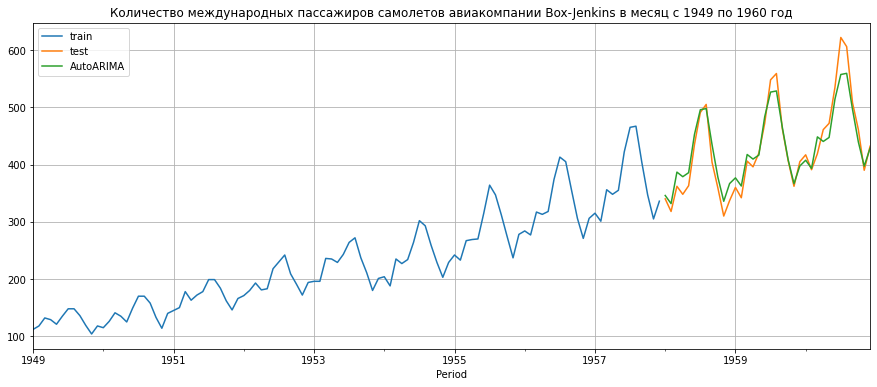

In [ ]:
from sktime.forecasting.arima import AutoARIMA
arm_forecaster = AutoARIMA(sp=12, suppress_warnings=True)
arm_forecaster.fit(y_train)
arm_y_pred = arm_forecaster.predict(fh)

y_train.plot(figsize=(15,6), grid=True, title='Количество международных пассажиров самолетов авиакомпании Box-Jenkins в месяц с 1949 по 1960 год', label='train')
y_test.plot(figsize=(15,6), grid=True, label='test')
arm_y_pred.plot(figsize=(15,6), grid=True, label='AutoARIMA')
plt.legend()
print(f'AutoARIMA MAPE: {arm_forecaster.score(y_test)*100:.2f}%')

До этого самый лучший результат был у тройного экспоненциального сглаживания (ETS MAPE: 5.14%). Попробуем улучшить результат на строительных материалах

AutoARIMA MAPE Песок: 6.93%


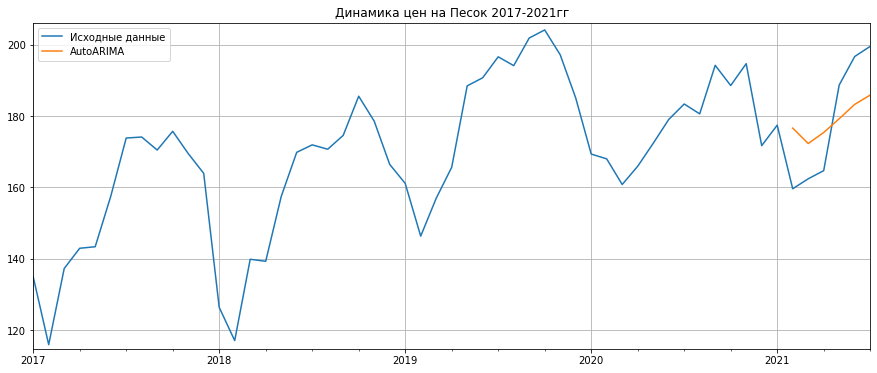

AutoARIMA MAPE Щебень: 2.06%


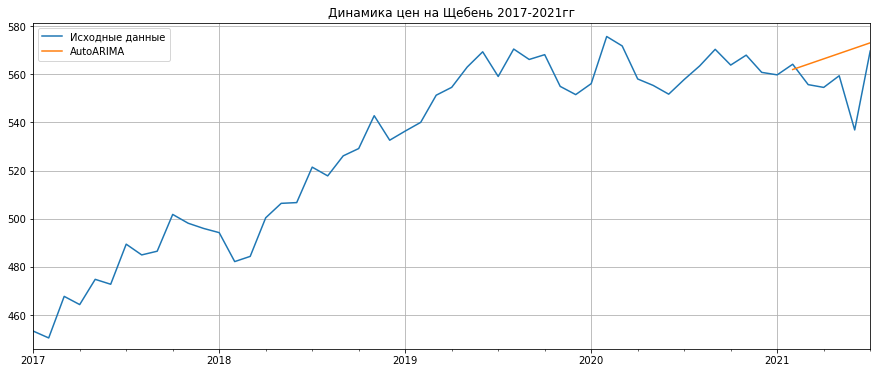

AutoARIMA MAPE Бетон: 1.73%


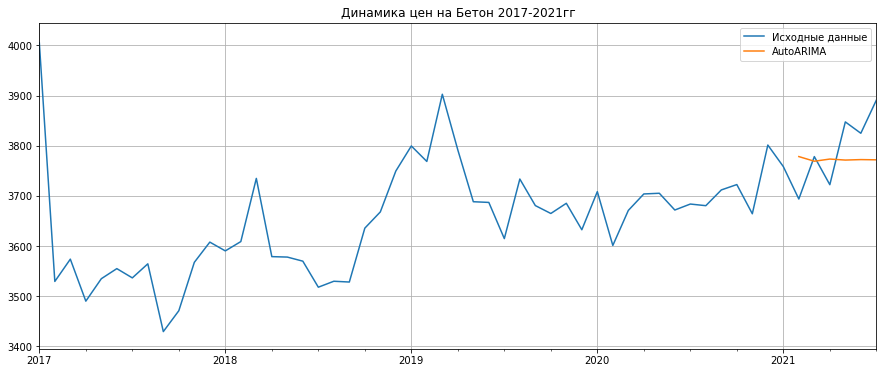

AutoARIMA MAPE Электроэнергия: 2.22%


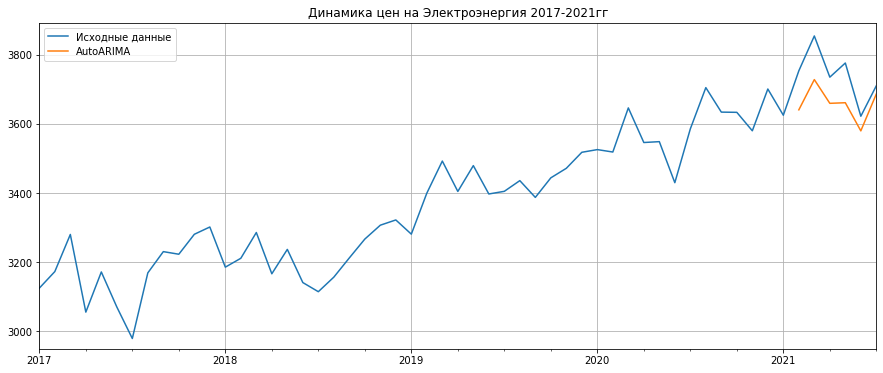

AutoARIMA MAPE Цемент: 1.36%


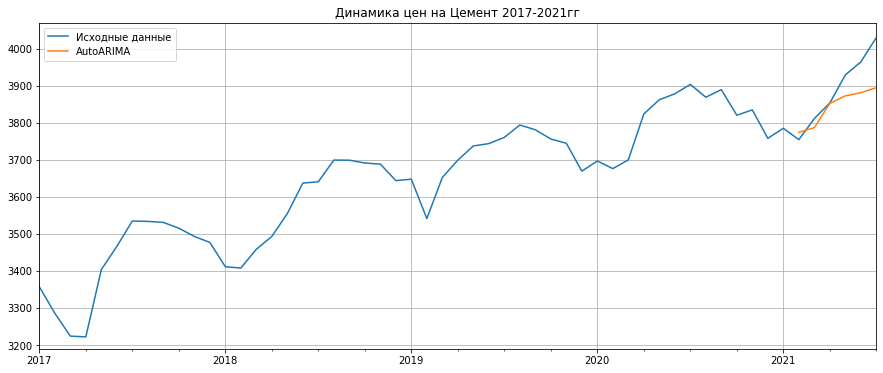

In [ ]:
scores_index.append('AutoARIMA MAPE')

for key in materials:
  arm_forecaster.fit(df_init[materials[key]][:-6])
  arm_y_pred_materials = arm_forecaster.predict(fh_materials)
  df_init[materials[key]].plot(figsize=(15,6), 
                               ylim=(df_init[materials[key]].min()*0.99, df_init[materials[key]].max()*1.01), 
                               grid=True, 
                               title='Динамика цен на '+key+' 2017-2021гг', 
                               label='Исходные данные')
  arm_y_pred_materials.plot(figsize=(15,6), grid=True, label='AutoARIMA')
  plt.legend()
  print(f'AutoARIMA MAPE {key}: {arm_forecaster.score(df_init[materials[key]][-6:])*100:.2f}%')
  scores[key].append(f'{arm_forecaster.score(df_init[materials[key]][-6:])*100:.2f}%')
  plt.show()

In [ ]:
df_scores = pd.DataFrame(scores, index=scores_index)

def get_mean(row):
  listx = []
  for x in row[:5]:
    listx.append(float(x[:-1]))
  return np.array(listx).mean()

df_scores['Средняя MAPE'] = df_scores.apply(get_mean, axis=1)
df_scores

,Песок,Щебень,Бетон,Электроэнергия,Цемент,Средняя MAPE
ETS MAPE,2.31%,2.96%,2.41%,1.90%,1.03%,2.122
AutoETS MAPE,2.92%,1.62%,1.79%,3.01%,1.15%,2.098
Theta MAPE,2.01%,2.26%,2.68%,2.20%,0.65%,1.960
Double ETS MAPE,8.43%,2.19%,1.21%,4.25%,2.85%,3.786
AutoARIMA MAPE,6.93%,2.06%,1.73%,2.22%,1.36%,2.860


<p>

**Промежуточные разультаты оценки точности алгоритмов:** лучший средний результат у Theta, хотя он не был лучшим во всех случаях. Лучших результат получился за счет отсутствия больших ошибок на разных данных. Таким образом, можно говорить, что Theta дает стабильно хороший результат.</p>
<p>Двойное экспоненциальное сглаживание дало очень хороший результат на бетоне, но за счет слишком больших ошибок на песке и цементе средний результат получился самым худшим. Похожая ситуация и с AutoARIMA.</p>

<h2>BATS TBATS в sktime</h2>
BATS (TBATS) расшифровывается как:

* (**T**rigonometric seasonality - Тригонометрическая сезонность)
* **B**ox-Cox transformation - Преобразование Бокса-Кокса
* **A**RMA errors - Ошибки ARMA
* **T**rend - Тренд
* **S**easonal components - Сезонность

In [ ]:
pip install tbats

     |████████████████████████████████| 43 kB 912 kB/s 


BATS MAPE: 14.11%
TBATS MAPE: 5.63%


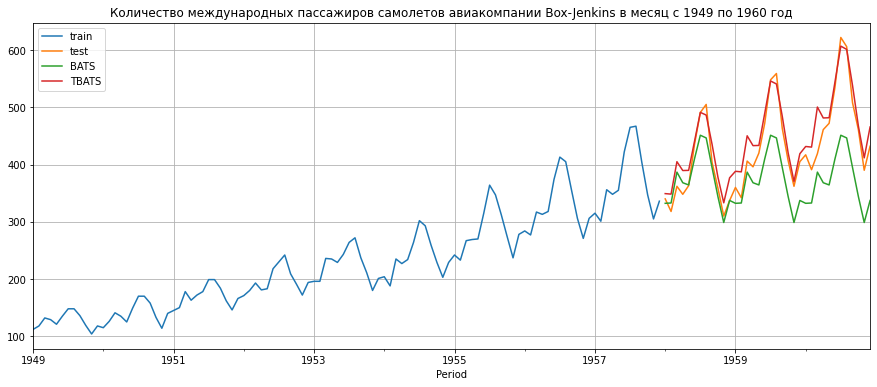

In [ ]:
from sktime.forecasting.bats import BATS
from sktime.forecasting.tbats import TBATS
bts_forecaster = BATS(sp=12)
bts_forecaster.fit(y_train)
bts_y_pred = bts_forecaster.predict(fh)

tbts_forecaster = TBATS(sp=12)
tbts_forecaster.fit(y_train)
tbts_y_pred = tbts_forecaster.predict(fh)

y_train.plot(figsize=(15,6), grid=True, title='Количество международных пассажиров самолетов авиакомпании Box-Jenkins в месяц с 1949 по 1960 год', label='train')
y_test.plot(figsize=(15,6), grid=True, label='test')
bts_y_pred.plot(figsize=(15,6), grid=True, label='BATS')
tbts_y_pred.plot(figsize=(15,6), grid=True, label='TBATS')
plt.legend()
print(f'BATS MAPE: {bts_forecaster.score(y_test)*100:.2f}%')
print(f'TBATS MAPE: {tbts_forecaster.score(y_test)*100:.2f}%')

BATS MAPE Песок: 3.02%
TBATS MAPE Песок: 2.93%


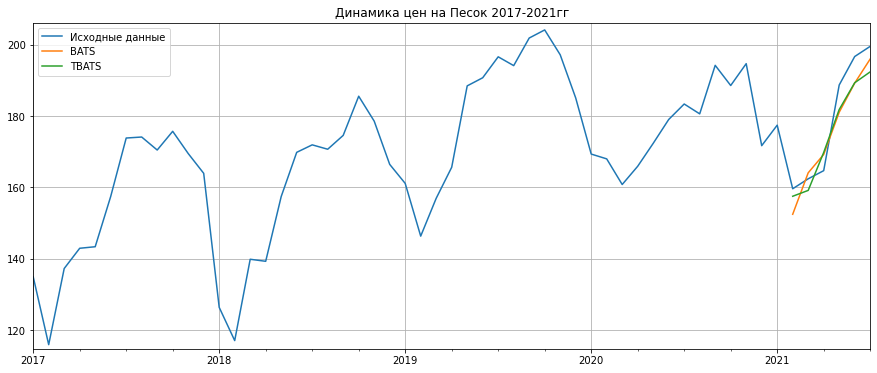

BATS MAPE Щебень: 2.05%
TBATS MAPE Щебень: 2.05%


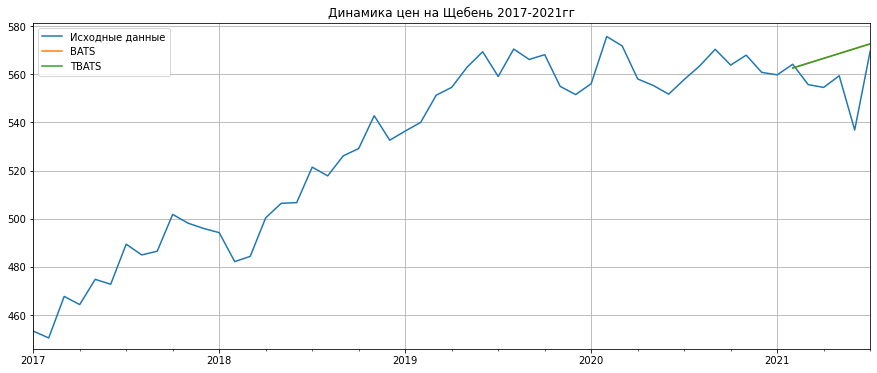

BATS MAPE Бетон: 3.26%
TBATS MAPE Бетон: 2.81%


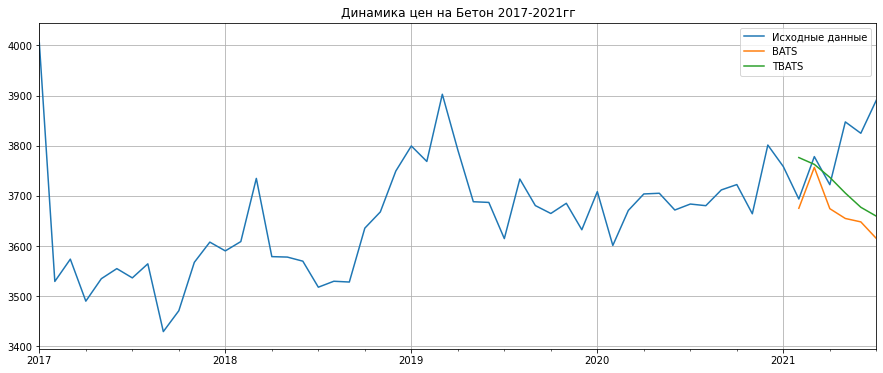

BATS MAPE Электроэнергия: 1.64%
TBATS MAPE Электроэнергия: 2.18%


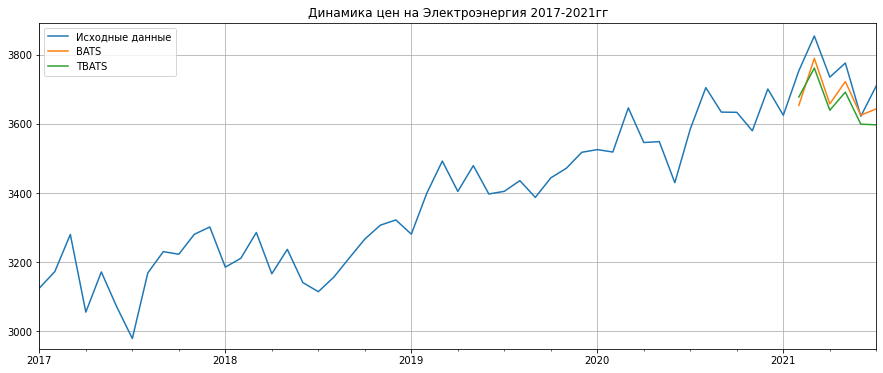

BATS MAPE Цемент: 2.17%
TBATS MAPE Цемент: 1.55%


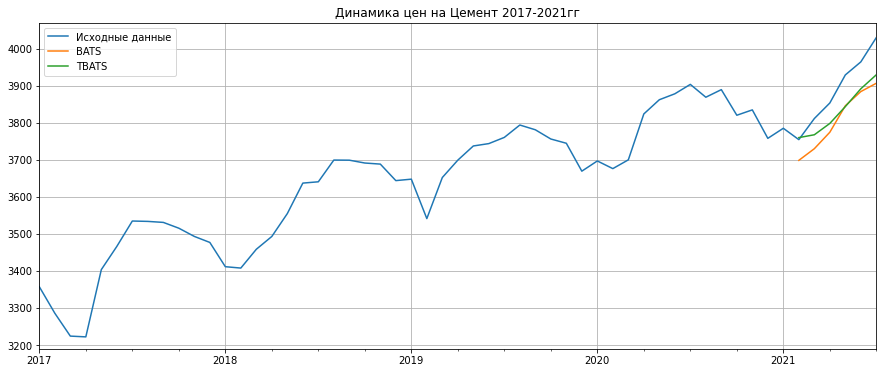

In [ ]:
scores_index.append('BATS')
scores_index.append('TBATS')

for key in materials:
  bts_forecaster.fit(df_init[materials[key]][:-6])
  bts_y_pred_materials = bts_forecaster.predict(fh_materials)
  tbts_forecaster.fit(df_init[materials[key]][:-6])
  tbts_y_pred_materials = tbts_forecaster.predict(fh_materials)
  
  df_init[materials[key]].plot(figsize=(15,6), 
                               ylim=(df_init[materials[key]].min()*0.99, df_init[materials[key]].max()*1.01), 
                               grid=True, 
                               title='Динамика цен на '+key+' 2017-2021гг', 
                               label='Исходные данные')
  bts_y_pred_materials.plot(figsize=(15,6), grid=True, label='BATS')
  tbts_y_pred_materials.plot(figsize=(15,6), grid=True, label='TBATS')

  plt.legend()

  print(f'BATS MAPE {key}: {bts_forecaster.score(df_init[materials[key]][-6:])*100:.2f}%')
  scores[key].append(f'{bts_forecaster.score(df_init[materials[key]][-6:])*100:.2f}%')
  print(f'TBATS MAPE {key}: {tbts_forecaster.score(df_init[materials[key]][-6:])*100:.2f}%')
  scores[key].append(f'{tbts_forecaster.score(df_init[materials[key]][-6:])*100:.2f}%')

  plt.show()

In [ ]:
df_scores = pd.DataFrame(scores, index=scores_index)
def get_mean(row):
  listx = []
  for x in row[:5]:
    listx.append(float(x[:-1]))
  return np.array(listx).mean()

df_scores['Средняя MAPE'] = df_scores.apply(get_mean, axis=1)
df_scores

,Песок,Щебень,Бетон,Электроэнергия,Цемент,Средняя MAPE
ETS MAPE,2.31%,2.96%,2.41%,1.90%,1.03%,2.122
AutoETS MAPE,2.92%,1.62%,1.79%,3.01%,1.15%,2.098
Theta MAPE,2.01%,2.26%,2.68%,2.20%,0.65%,1.960
Double ETS MAPE,8.43%,2.19%,1.21%,4.25%,2.85%,3.786
AutoARIMA MAPE,6.93%,2.06%,1.73%,2.22%,1.36%,2.860
BATS,3.02%,2.05%,3.26%,1.64%,2.17%,2.428
TBATS,2.93%,2.05%,2.81%,2.18%,1.55%,2.304


<h2>Прогнозирование полиноминальных трендов в sktime</h2>
<p>Полиноминальный тренд - тренд отличается от прямого линейного тренда. Класс PolynomialTrendForecaster в sktime при настройках по умолчанию использует линейную регрессию sklearn (sklearn.linear_model.LinearRegression) с первой степенью полиноминального преобразования признаков. Можно использовать другую регрессионную модель sklearn, определив ее в параметре "regressor".
</p>

Linear Regression MAPE: 12.18%
LGBMRegressor MAPE: 18.75%
RandomForestRegressor MAPE: 23.03%


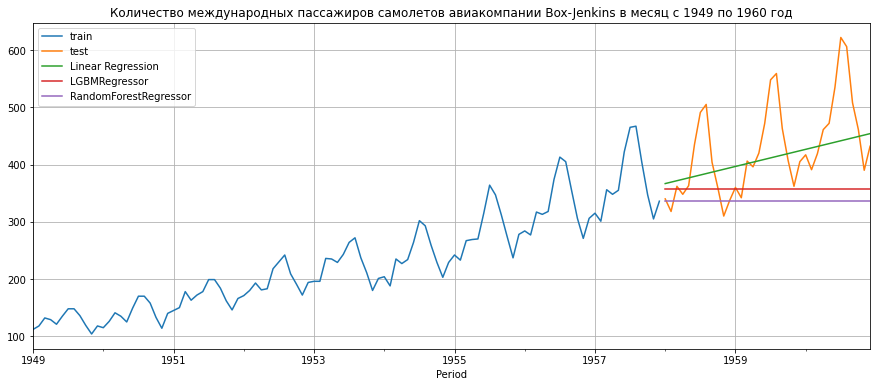

In [ ]:
from sktime.forecasting.trend import PolynomialTrendForecaster
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor

pn_forecaster = PolynomialTrendForecaster(degree=1)
pn_forecaster.fit(y_train)
pn_y_pred = pn_forecaster.predict(fh)

lgbm_forecaster = PolynomialTrendForecaster(regressor=LGBMRegressor(n_estimators=500, learning_rate=0.05), degree=1)
lgbm_forecaster.fit(y_train)
lgbm_y_pred = lgbm_forecaster.predict(fh)

rf_forecaster = PolynomialTrendForecaster(regressor=RandomForestRegressor(random_state=0), degree=1)
rf_forecaster.fit(y_train)
rf_y_pred = rf_forecaster.predict(fh)

y_train.plot(figsize=(15,6), grid=True, title='Количество международных пассажиров самолетов авиакомпании Box-Jenkins в месяц с 1949 по 1960 год', label='train')
y_test.plot(figsize=(15,6), grid=True, label='test')
pn_y_pred.plot(figsize=(15,6), grid=True, label='Linear Regression')
lgbm_y_pred.plot(figsize=(15,6), grid=True, label='LGBMRegressor')
rf_y_pred.plot(figsize=(15,6), grid=True, label='RandomForestRegressor')
plt.legend()
print(f'Linear Regression MAPE: {pn_forecaster.score(y_test)*100:.2f}%')
print(f'LGBMRegressor MAPE: {lgbm_forecaster.score(y_test)*100:.2f}%')
print(f'RandomForestRegressor MAPE: {rf_forecaster.score(y_test)*100:.2f}%')

<h2>Прогнозирование с помощью регрессоров sklearn</h2>

LGBMRegressor MAPE: 17.53%
RandomForestRegressor MAPE: 12.63%


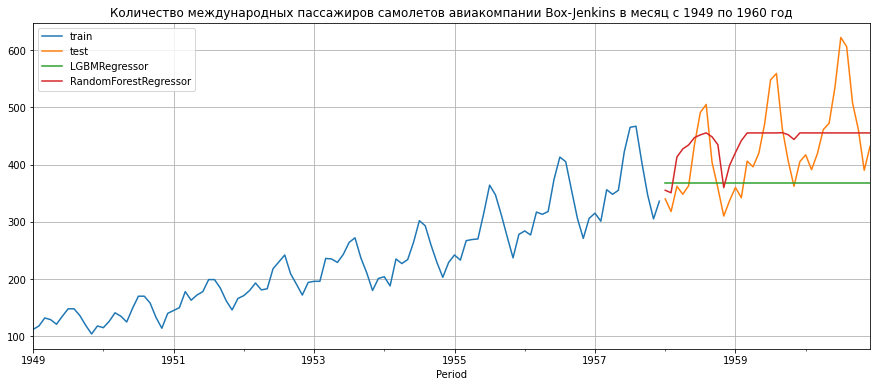

In [ ]:
from sktime.forecasting.compose import make_reduction

lgbmr_forecaster = make_reduction(LGBMRegressor(n_estimators=500, learning_rate=0.05), 
                                 window_length=12, 
                                 strategy="recursive")
lgbmr_forecaster.fit(y_train)
lgbmr_y_pred = lgbmr_forecaster.predict(fh)

rfr_forecaster = make_reduction(RandomForestRegressor(random_state=0), 
                                window_length=12, 
                                strategy="recursive")
rfr_forecaster.fit(y_train)
rfr_y_pred = rfr_forecaster.predict(fh)

y_train.plot(figsize=(15,6), grid=True, title='Количество международных пассажиров самолетов авиакомпании Box-Jenkins в месяц с 1949 по 1960 год', label='train')
y_test.plot(figsize=(15,6), grid=True, label='test')
lgbmr_y_pred.plot(figsize=(15,6), grid=True, label='LGBMRegressor')
rfr_y_pred.plot(figsize=(15,6), grid=True, label='RandomForestRegressor')
plt.legend()
print(f'LGBMRegressor MAPE: {lgbmr_forecaster.score(y_test)*100:.2f}%')
print(f'RandomForestRegressor MAPE: {rfr_forecaster.score(y_test)*100:.2f}%')

<h2>Модификаторы временных рядов в sktime</h2>

В библиотеке sktime есть различные модификаторы временных рядов. Они могут использоваться в том числе для приведения временного ряда к станционарному. Нестационарность временного ряда характеризуется критерием Дики-Фуллера. Как и следовало ожидать в исходном временном ряду критерий Дики-Фуллера очень высокий, соответственно, ряд не стационарный. У станционарного временного ряда критерий Дики-Фуллера равен или очень близок к нулю.

In [ ]:
import statsmodels as sm
print(f'Критерий Дикки-Фуллера: {sm.tsa.stattools.adfuller(y)[0]:.10f}')
print(f'p-value: {sm.tsa.stattools.adfuller(y)[1]:.10f}')
print(f'Критические значения {sm.tsa.stattools.adfuller(y)[4]}')
if sm.tsa.stattools.adfuller(y)[0] > sm.tsa.stattools.adfuller(y)[4]['1%']:
  print(f'Ряд не стационарный, так как значение критерия Дикки-Фуллера ({sm.tsa.stattools.adfuller(y)[0]:.10f}) больше критического значения 1% ({sm.tsa.stattools.adfuller(y)[4]["1%"]:.10f})')
else:
  print(f'Ряд стационарный, так как значение критерия Дикки-Фуллера ({sm.tsa.stattools.adfuller(y)[0]:.10f}) меньше критического значения 1% ({sm.tsa.stattools.adfuller(y)[4]["1%"]:.10f})')

Критерий Дикки-Фуллера: 0.8153688792
p-value: 0.9918802434
Критические значения {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}
Ряд не стационарный, так как значение критерия Дикки-Фуллера (0.8153688792) больше критического значения 1% (-3.4816817173)


Для того чтобы убрать тренд из временного ряда можно использоваться класс Detrender. Для определения тренда класс Detrender по умолчанию использует PolynomialTrendForecaster. Но можно использовать и любой другой алгоритм sktime.

Критерий Дикки-Фуллера: -2.1019659059
p-value: 0.2437248360
Критические значения {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}
Ряд не стационарный, так как значение критерия Дикки-Фуллера (-2.1019659059) больше критического значения 1% (-3.4816817173)


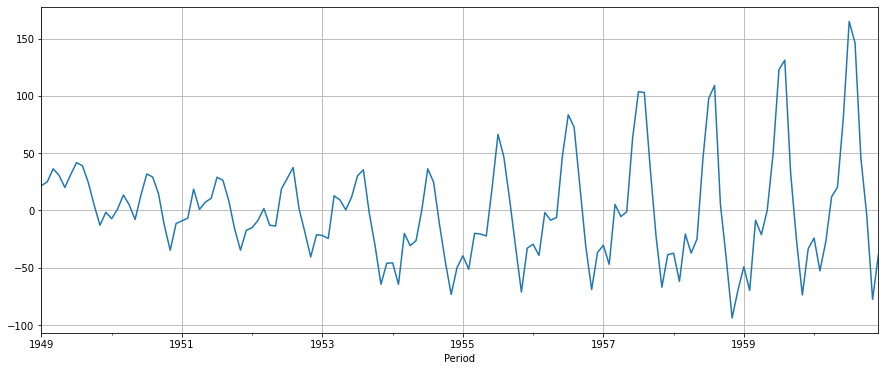

In [ ]:
from sktime.transformations.series.detrend import Detrender
from sktime.transformations.series.detrend import Deseasonalizer

detrender = Detrender()
y_dtrd = detrender.fit_transform(y)
y_dtrd.plot(figsize=(15,6), grid=True)
print(f'Критерий Дикки-Фуллера: {sm.tsa.stattools.adfuller(y_dtrd)[0]:.10f}')
print(f'p-value: {sm.tsa.stattools.adfuller(y_dtrd)[1]:.10f}')
print(f'Критические значения {sm.tsa.stattools.adfuller(y_dtrd)[4]}')
if sm.tsa.stattools.adfuller(y_dtrd)[0] > sm.tsa.stattools.adfuller(y_dtrd)[4]['1%']:
  print(f'Ряд не стационарный, так как значение критерия Дикки-Фуллера ({sm.tsa.stattools.adfuller(y_dtrd)[0]:.10f}) больше критического значения 1% ({sm.tsa.stattools.adfuller(y_dtrd)[4]["1%"]:.10f})')
else:
  print(f'Ряд стационарный, так как значение критерия Дикки-Фуллера ({sm.tsa.stattools.adfuller(y_dtrd)[0]:.10f}) меньше критического значения 1% ({sm.tsa.stattools.adfuller(y_dtrd)[4]["1%"]:.10f})')

Критерий Дикки-Фуллера: -3.3461471324
p-value: 0.0129375667
Критические значения {'1%': -3.4808880719210005, '5%': -2.8836966192225284, '10%': -2.5785857598714417}
Ряд не стационарный, так как значение критерия Дикки-Фуллера (-3.3461471324) больше критического значения 1% (-3.4808880719)


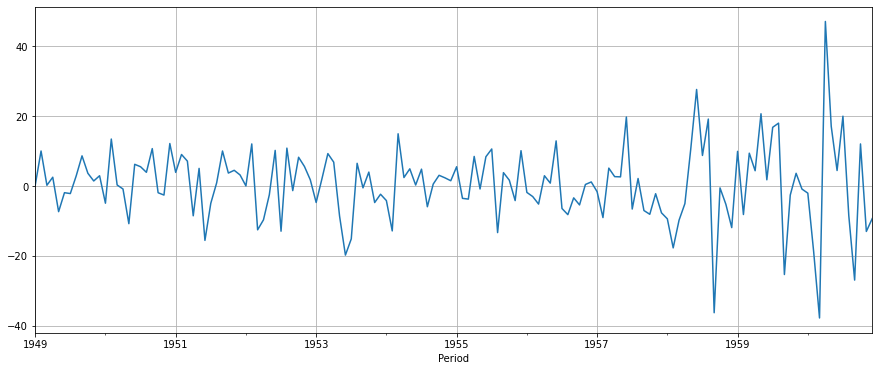

In [ ]:
detrender_tbats = Detrender(forecaster=TBATS(sp=12))
y_dtrd_tbats = detrender_tbats.fit_transform(y)
y_dtrd_tbats.plot(figsize=(15,6), grid=True)
print(f'Критерий Дикки-Фуллера: {sm.tsa.stattools.adfuller(y_dtrd_tbats)[0]:.10f}')
print(f'p-value: {sm.tsa.stattools.adfuller(y_dtrd_tbats)[1]:.10f}')
print(f'Критические значения {sm.tsa.stattools.adfuller(y_dtrd_tbats)[4]}')
if sm.tsa.stattools.adfuller(y_dtrd_tbats)[0] > sm.tsa.stattools.adfuller(y_dtrd_tbats)[4]['1%']:
  print(f'Ряд не стационарный, так как значение критерия Дикки-Фуллера ({sm.tsa.stattools.adfuller(y_dtrd_tbats)[0]:.10f}) больше критического значения 1% ({sm.tsa.stattools.adfuller(y_dtrd_tbats)[4]["1%"]:.10f})')
else:
  print(f'Ряд стационарный, так как значение критерия Дикки-Фуллера ({sm.tsa.stattools.adfuller(y_dtrd_tbats)[0]:.10f}) меньше критического значения 1% ({sm.tsa.stattools.adfuller(y_dtrd_tbats)[4]["1%"]:.10f})')

Алгоритм TBATS значительно лучше справляется с определением тренда и ряд стал значительно более стационарным. Кроме исключения тренда (Detrender) для приведения ряда к станционарному используются разности различных порядков (Diferencer), исключение сезонной составляющей (Deseasonalizer), сглаживания и преобразования, например, Бокса-Кокса или логарифмирование (LogTransformer).

Критерий Дикки-Фуллера: -1.7170170891
p-value: 0.4223667748
Критические значения {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}
Ряд не стационарный, так как значение критерия Дикки-Фуллера (-1.7170170891) больше критического значения 1% (-3.4816817173)


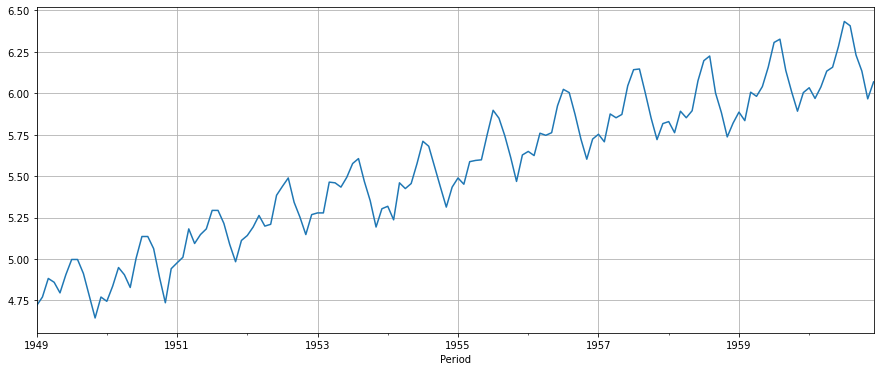

In [ ]:
from sktime.transformations.series.boxcox import LogTransformer
logtransformer = LogTransformer()
y_log = logtransformer.fit_transform(y)
y_log.plot(figsize=(15,6), grid=True)
print(f'Критерий Дикки-Фуллера: {sm.tsa.stattools.adfuller(y_log)[0]:.10f}')
print(f'p-value: {sm.tsa.stattools.adfuller(y_log)[1]:.10f}')
print(f'Критические значения {sm.tsa.stattools.adfuller(y_log)[4]}')
if sm.tsa.stattools.adfuller(y_log)[0] > sm.tsa.stattools.adfuller(y_log)[4]['1%']:
  print(f'Ряд не стационарный, так как значение критерия Дикки-Фуллера ({sm.tsa.stattools.adfuller(y_log)[0]:.10f}) больше критического значения 1% ({sm.tsa.stattools.adfuller(y_log)[4]["1%"]:.10f})')
else:
  print(f'Ряд стационарный, так как значение критерия Дикки-Фуллера ({sm.tsa.stattools.adfuller(y_log)[0]:.10f}) меньше критического значения 1% ({sm.tsa.stattools.adfuller(y_log)[4]["1%"]:.10f})')

Критерий Дикки-Фуллера: -2.8292668242
p-value: 0.0542132903
Критические значения {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}
Ряд не стационарный, так как значение критерия Дикки-Фуллера (-2.8292668242) больше критического значения 1% (-3.4816817173)


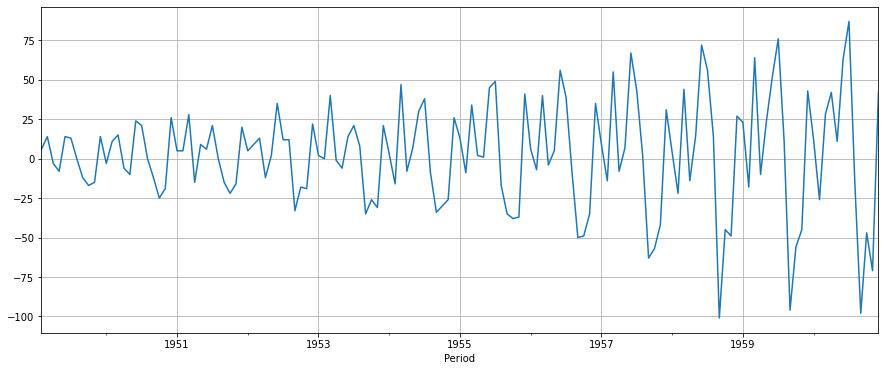

In [ ]:
from sktime.transformations.series.difference import Differencer
differencer = Differencer()
y_dif = differencer.fit_transform(y)
y_dif.plot(figsize=(15,6), grid=True)
print(f'Критерий Дикки-Фуллера: {sm.tsa.stattools.adfuller(y_dif)[0]:.10f}')
print(f'p-value: {sm.tsa.stattools.adfuller(y_dif)[1]:.10f}')
print(f'Критические значения {sm.tsa.stattools.adfuller(y_dif)[4]}')
if sm.tsa.stattools.adfuller(y_dif)[0] > sm.tsa.stattools.adfuller(y_dif)[4]['1%']:
  print(f'Ряд не стационарный, так как значение критерия Дикки-Фуллера ({sm.tsa.stattools.adfuller(y_dif)[0]:.10f}) больше критического значения 1% ({sm.tsa.stattools.adfuller(y_dif)[4]["1%"]:.10f})')
else:
  print(f'Ряд стационарный, так как значение критерия Дикки-Фуллера ({sm.tsa.stattools.adfuller(y_dif)[0]:.10f}) меньше критического значения 1% ({sm.tsa.stattools.adfuller(y_dif)[4]["1%"]:.10f})')

Критерий Дикки-Фуллера: -1.3260708969
p-value: 0.6171620657
Критические значения {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}
Ряд не стационарный, так как значение критерия Дикки-Фуллера (-1.3260708969) больше критического значения 1% (-3.4816817173)


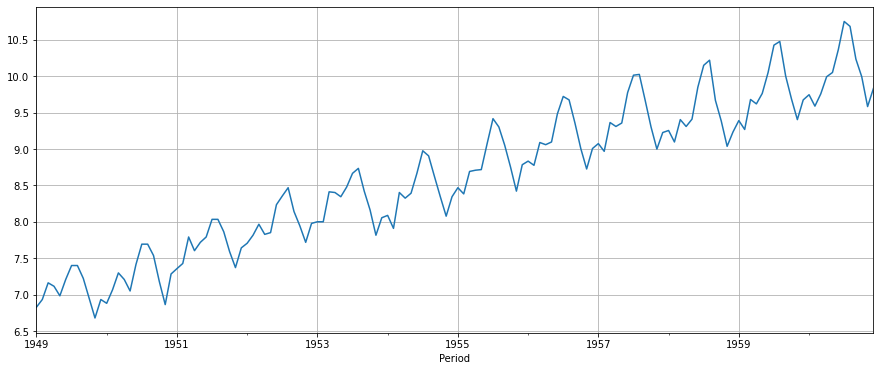

In [ ]:
from sktime.transformations.series.boxcox import BoxCoxTransformer
bc_transformer = BoxCoxTransformer()
y_bc = bc_transformer.fit_transform(y)
y_bc.plot(figsize=(15,6), grid=True)
print(f'Критерий Дикки-Фуллера: {sm.tsa.stattools.adfuller(y_bc)[0]:.10f}')
print(f'p-value: {sm.tsa.stattools.adfuller(y_bc)[1]:.10f}')
print(f'Критические значения {sm.tsa.stattools.adfuller(y_bc)[4]}')
if sm.tsa.stattools.adfuller(y_bc)[0] > sm.tsa.stattools.adfuller(y_bc)[4]['1%']:
  print(f'Ряд не стационарный, так как значение критерия Дикки-Фуллера ({sm.tsa.stattools.adfuller(y_bc)[0]:.10f}) больше критического значения 1% ({sm.tsa.stattools.adfuller(y_bc)[4]["1%"]:.10f})')
else:
  print(f'Ряд стационарный, так как значение критерия Дикки-Фуллера ({sm.tsa.stattools.adfuller(y_bc)[0]:.10f}) меньше критического значения 1% ({sm.tsa.stattools.adfuller(y_bc)[4]["1%"]:.10f})')

Критерий Дикки-Фуллера: 1.1441069411
p-value: 0.9955760227
Критические значения {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}
Ряд не стационарный, так как значение критерия Дикки-Фуллера (1.1441069411) больше критического значения 1% (-3.4816817173)


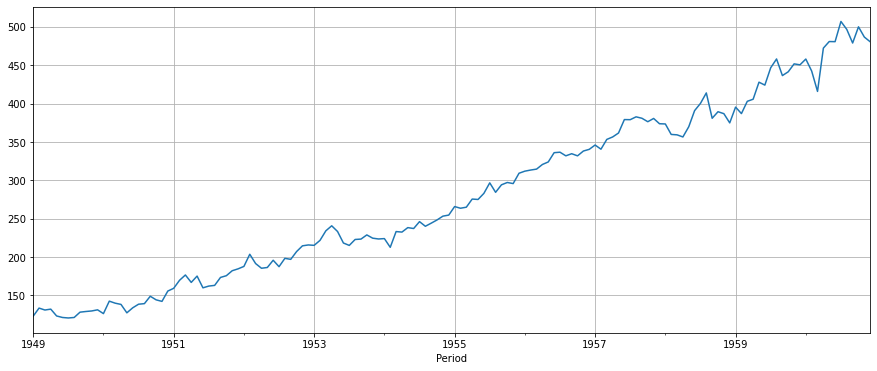

In [ ]:
deseasonalizer = Deseasonalizer(sp=12, model='multiplicative')
y_deseason = deseasonalizer.fit_transform(y)
y_deseason.plot(figsize=(15,6), grid=True)
print(f'Критерий Дикки-Фуллера: {sm.tsa.stattools.adfuller(y_deseason)[0]:.10f}')
print(f'p-value: {sm.tsa.stattools.adfuller(y_deseason)[1]:.10f}')
print(f'Критические значения {sm.tsa.stattools.adfuller(y_deseason)[4]}')
if sm.tsa.stattools.adfuller(y_deseason)[0] > sm.tsa.stattools.adfuller(y_deseason)[4]['1%']:
  print(f'Ряд не стационарный, так как значение критерия Дикки-Фуллера ({sm.tsa.stattools.adfuller(y_deseason)[0]:.10f}) больше критического значения 1% ({sm.tsa.stattools.adfuller(y_deseason)[4]["1%"]:.10f})')
else:
  print(f'Ряд стационарный, так как значение критерия Дикки-Фуллера ({sm.tsa.stattools.adfuller(y_deseason)[0]:.10f}) меньше критического значения 1% ({sm.tsa.stattools.adfuller(y_deseason)[4]["1%"]:.10f})')

Критерий Дикки-Фуллера: -1.9232552211
p-value: 0.3212014356
Критические значения {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}
Ряд не стационарный, так как значение критерия Дикки-Фуллера (-1.9232552211) больше критического значения 1% (-3.4816817173)


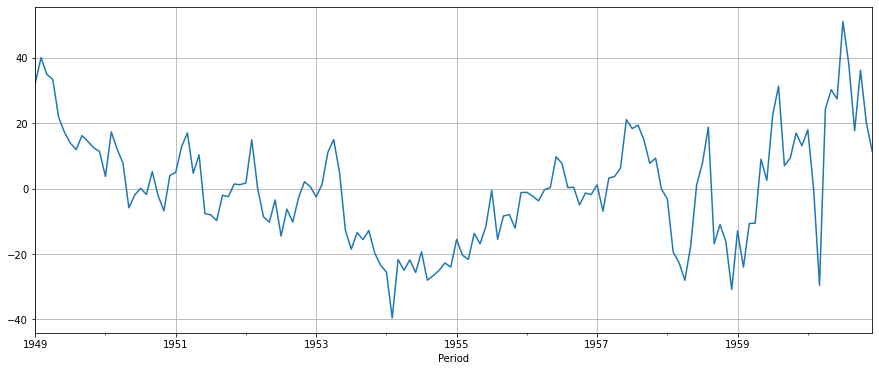

In [ ]:
y_deseason_dtrd = detrender.fit_transform(y_deseason)
y_deseason_dtrd.plot(figsize=(15,6), grid=True)
print(f'Критерий Дикки-Фуллера: {sm.tsa.stattools.adfuller(y_deseason_dtrd)[0]:.10f}')
print(f'p-value: {sm.tsa.stattools.adfuller(y_deseason_dtrd)[1]:.10f}')
print(f'Критические значения {sm.tsa.stattools.adfuller(y_deseason_dtrd)[4]}')
if sm.tsa.stattools.adfuller(y_deseason_dtrd)[0] > sm.tsa.stattools.adfuller(y_deseason_dtrd)[4]['1%']:
  print(f'Ряд не стационарный, так как значение критерия Дикки-Фуллера ({sm.tsa.stattools.adfuller(y_deseason_dtrd)[0]:.10f}) больше критического значения 1% ({sm.tsa.stattools.adfuller(y_deseason_dtrd)[4]["1%"]:.10f})')
else:
  print(f'Ряд стационарный, так как значение критерия Дикки-Фуллера ({sm.tsa.stattools.adfuller(y_deseason_dtrd)[0]:.10f}) меньше критического значения 1% ({sm.tsa.stattools.adfuller(y_deseason_dtrd)[4]["1%"]:.10f})')

Критерий Дикки-Фуллера: -1.8136772465
p-value: 0.3736927734
Критические значения {'1%': -3.481281802271349, '5%': -2.883867891664528, '10%': -2.5786771965503177}
Ряд не стационарный, так как значение критерия Дикки-Фуллера (-1.8136772465) больше критического значения 1% (-3.4812818023)


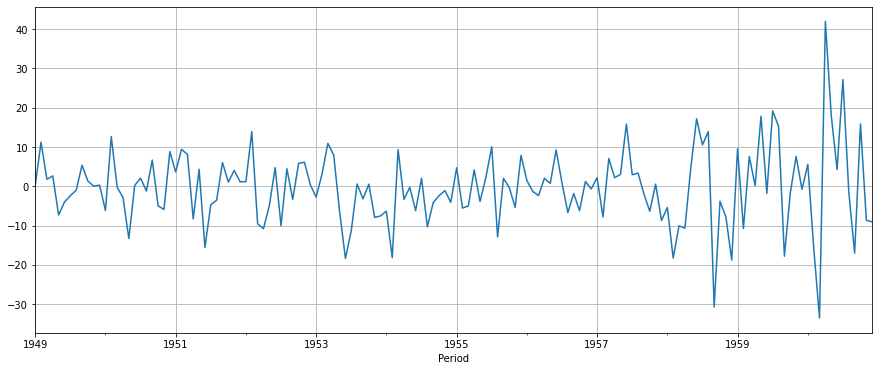

In [ ]:
y_deseason_dtrd_tbats = detrender_tbats.fit_transform(y_deseason_dtrd)
y_deseason_dtrd_tbats.plot(figsize=(15,6), grid=True)
print(f'Критерий Дикки-Фуллера: {sm.tsa.stattools.adfuller(y_deseason_dtrd_tbats)[0]:.10f}')
print(f'p-value: {sm.tsa.stattools.adfuller(y_deseason_dtrd_tbats)[1]:.10f}')
print(f'Критические значения {sm.tsa.stattools.adfuller(y_deseason_dtrd_tbats)[4]}')
if sm.tsa.stattools.adfuller(y_deseason_dtrd_tbats)[0] > sm.tsa.stattools.adfuller(y_deseason_dtrd_tbats)[4]['1%']:
  print(f'Ряд не стационарный, так как значение критерия Дикки-Фуллера ({sm.tsa.stattools.adfuller(y_deseason_dtrd_tbats)[0]:.10f}) больше критического значения 1% ({sm.tsa.stattools.adfuller(y_deseason_dtrd_tbats)[4]["1%"]:.10f})')
else:
  print(f'Ряд стационарный, так как значение критерия Дикки-Фуллера ({sm.tsa.stattools.adfuller(y_deseason_dtrd_tbats)[0]:.10f}) меньше критического значения 1% ({sm.tsa.stattools.adfuller(y_deseason_dtrd_tbats)[4]["1%"]:.10f})')

В составе sktime есть конструктор конвейров (TransformedTargetForecaster), который позволяет значительно упростить процесс выбора алгоритма обработки временного ряда

Критерий Дикки-Фуллера: -5.8518612943
p-value: 0.0000003574
Критические значения {'1%': -3.479742586699182, '5%': -2.88319822181578, '10%': -2.578319684499314}
Ряд стационарный, так как значение критерия Дикки-Фуллера (-5.8518612943) меньше критического значения 1% (-3.4797425867)


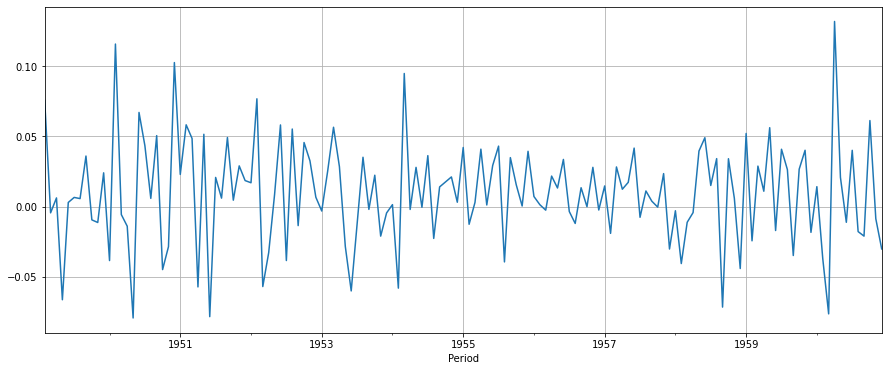

In [ ]:
from sktime.forecasting.compose import TransformedTargetForecaster

transformer = TransformedTargetForecaster(steps=[
                                                  ("logtransform", LogTransformer()),
                                                  ("deseasonalizer", Deseasonalizer(sp=12, model='multiplicative')),
                                                  ("differencer", Differencer()),
                                                  ("forecaster", NaiveForecaster(strategy="drift"))
                                                  ]
                                          )
y_hat = transformer.fit_transform(y)
y_hat.plot(figsize=(15,6), grid=True)
print(f'Критерий Дикки-Фуллера: {sm.tsa.stattools.adfuller(y_hat)[0]:.10f}')
print(f'p-value: {sm.tsa.stattools.adfuller(y_hat)[1]:.10f}')
print(f'Критические значения {sm.tsa.stattools.adfuller(y_hat)[4]}')
if sm.tsa.stattools.adfuller(y_hat)[0] > sm.tsa.stattools.adfuller(y_hat)[4]['1%']:
  print(f'Ряд не стационарный, так как значение критерия Дикки-Фуллера ({sm.tsa.stattools.adfuller(y_hat)[0]:.10f}) больше критического значения 1% ({sm.tsa.stattools.adfuller(y_hat)[4]["1%"]:.10f})')
else:
  print(f'Ряд стационарный, так как значение критерия Дикки-Фуллера ({sm.tsa.stattools.adfuller(y_hat)[0]:.10f}) меньше критического значения 1% ({sm.tsa.stattools.adfuller(y_hat)[4]["1%"]:.10f})')

Критерий Дикки-Фуллера: -6.2877895540
p-value: 0.0000000366
Критические значения {'1%': -3.479742586699182, '5%': -2.88319822181578, '10%': -2.578319684499314}
Ряд стационарный, так как значение критерия Дикки-Фуллера (-6.2877895540) меньше критического значения 1% (-3.4797425867)


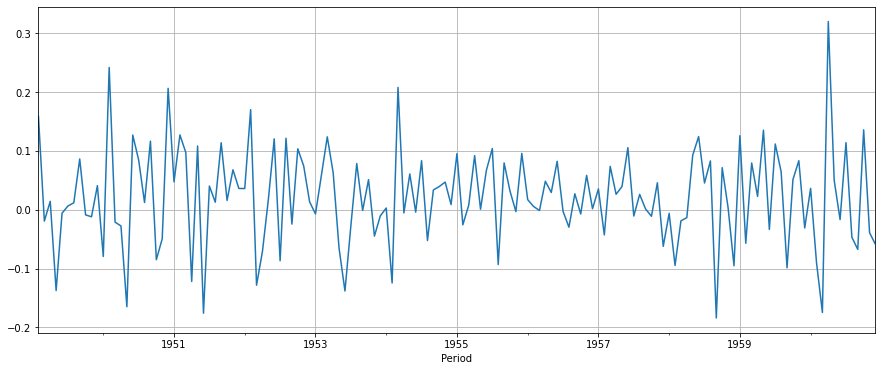

In [ ]:
transformer = TransformedTargetForecaster(steps=[
                                                  ("box-cox_transform", BoxCoxTransformer()),
                                                  ("deseasonalizer", Deseasonalizer(sp=12, model='multiplicative')),
                                                  ("differencer", Differencer()),
                                                  ("forecaster", NaiveForecaster(strategy="drift"))
                                                  ]
                                          )
y_hat = transformer.fit_transform(y)
y_hat.plot(figsize=(15,6), grid=True)
print(f'Критерий Дикки-Фуллера: {sm.tsa.stattools.adfuller(y_hat)[0]:.10f}')
print(f'p-value: {sm.tsa.stattools.adfuller(y_hat)[1]:.10f}')
print(f'Критические значения {sm.tsa.stattools.adfuller(y_hat)[4]}')
if sm.tsa.stattools.adfuller(y_hat)[0] > sm.tsa.stattools.adfuller(y_hat)[4]['1%']:
  print(f'Ряд не стационарный, так как значение критерия Дикки-Фуллера ({sm.tsa.stattools.adfuller(y_hat)[0]:.10f}) больше критического значения 1% ({sm.tsa.stattools.adfuller(y_hat)[4]["1%"]:.10f})')
else:
  print(f'Ряд стационарный, так как значение критерия Дикки-Фуллера ({sm.tsa.stattools.adfuller(y_hat)[0]:.10f}) меньше критического значения 1% ({sm.tsa.stattools.adfuller(y_hat)[4]["1%"]:.10f})')